In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Contraceptive Dataset Analysis

In [2]:
contraceptive_data = pd.read_csv("https://github.com/kmart67/data_100_contraceptive_final_proj/raw/master/data/contraceptive_for_students.csv")
contraceptive_data.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
# One-Hot Encoding of features in contraceptive_data 

Wife_Ed = pd.get_dummies(contraceptive_data['wife_education']).rename(columns={1:"WifeEd_low", 2:"WifeEd_med-low", 3:"WifeEd_med-high", 4:"WifeEd_high"})
Hus_Ed = pd.get_dummies(contraceptive_data['husband_education']).rename(columns={1:"HusEd_low", 2:"HusEd_med-low", 3:"HusEd_med-high", 4:"HusEd_high"})
Wife_Rel = pd.get_dummies(contraceptive_data['wife_religion']).rename(columns={0:"Wife_Non-Islam", 1:"Wife_Islam"})
Wife_Work = pd.get_dummies(contraceptive_data['wife_work']).rename(columns={0:"Wife_Working", 1:"Wife_Not_Working"})
Standard_Of_Liv = pd.get_dummies(contraceptive_data['standard_living']).rename(columns={1:"StdLiv_low", 2:"StdLiv_med-low", 3:"StdLiv_med-high", 4:"StdLiv_high"})
Hus_Occ = pd.get_dummies(contraceptive_data['husband_occupation']).rename(columns={1:"HusOcc_1", 2:"HusOcc_2", 3:"HusOcc_3", 4:"HusOcc_4"})
contraceptive_altered = pd.concat([Wife_Ed, Hus_Ed, Wife_Rel,Wife_Work,Hus_Occ, Standard_Of_Liv], axis=1)
contraceptive_altered['wife_age'] = contraceptive_data['wife_age']
contraceptive_altered['num_child'] = contraceptive_data['num_child']
contraceptive_altered['media_exposure'] = contraceptive_data['media_exposure']
cols = ['wife_age','WifeEd_low','WifeEd_med-low','WifeEd_med-high','WifeEd_high','HusEd_low','HusEd_med-low','HusEd_med-high','HusEd_high', 'num_child','Wife_Non-Islam','Wife_Islam', 'Wife_Working', 'Wife_Not_Working', 'HusOcc_1','HusOcc_2',
 'HusOcc_3','HusOcc_4','StdLiv_low','StdLiv_med-low','StdLiv_med-high','StdLiv_high', 'media_exposure']
contraceptive_altered = contraceptive_altered[cols]
contraceptive_altered['contraceptive'] = contraceptive_data['contraceptive']
contraceptive_altered.dropna(inplace=True)
contraceptive_altered.head()

,wife_age,WifeEd_low,WifeEd_med-low,WifeEd_med-high,WifeEd_high,HusEd_low,HusEd_med-low,HusEd_med-high,HusEd_high,num_child,...,HusOcc_1,HusOcc_2,HusOcc_3,HusOcc_4,StdLiv_low,StdLiv_med-low,StdLiv_med-high,StdLiv_high,media_exposure,contraceptive
0,24,0,1,0,0,0,0,1,0,3,...,0,1,0,0,0,0,1,0,0,1
1,45,1,0,0,0,0,0,1,0,10,...,0,0,1,0,0,0,0,1,0,1
2,43,0,1,0,0,0,0,1,0,7,...,0,0,1,0,0,0,0,1,0,1
3,42,0,0,1,0,0,1,0,0,9,...,0,0,1,0,0,0,1,0,0,1
4,36,0,0,1,0,0,0,1,0,8,...,0,0,1,0,0,1,0,0,0,1


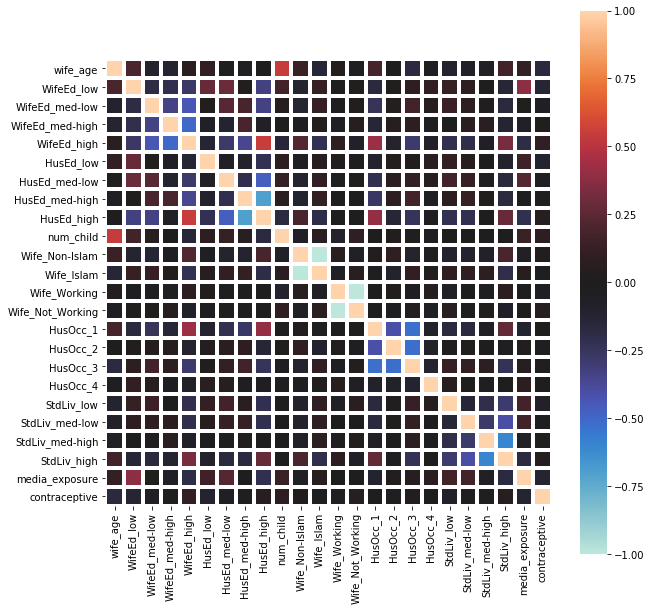

In [13]:
#Correlation Heatmap of columns in contraceptive_altered with contraceptive column
sss= contraceptive_altered.copy()
sss = sss.corr()
plt.figure(figsize=(10,10)) 
sns.heatmap(sss, vmax=1, center=0, square=True, linewidths=3)

In [15]:
def is_long_term(contraceptive):
  return 1 if contraceptive == 3 else 0

def is_short_term(contraceptive):
  return 1 if contraceptive == 2 else 0

def get_age_range(wife_age):
    if wife_age in range(13, 19):
        return '13-18'
    if wife_age in range(19, 25):
        return '19-24'
    if wife_age in range(25, 35):
        return '25-34'
    if wife_age in range(35, 45):
        return '35-44'
    if wife_age in range(45, 55):
        return '45-54'
    if wife_age in range(55, 65):
        return '55-64'
    return '65+'

contraceptive_data_analysis = contraceptive_data[contraceptive_data['contraceptive'] > 1]
contraceptive_data_analysis['long_term'] = contraceptive_data_analysis.apply(lambda row: is_long_term(row.contraceptive), axis = 1)
contraceptive_data_analysis['short_term'] = contraceptive_data_analysis.apply(lambda row: is_short_term(row.contraceptive), axis = 1)
contraceptive_data_analysis['wife_age_range'] = contraceptive_data_analysis.apply(lambda row: get_age_range(row.wife_age), axis = 1)
contraceptive_data_analysis.head()

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive,long_term,short_term,wife_age_range
415,33,3,3,6,1,1,3,4,0,2,0,1,25-34
416,46,4,3,5,1,1,1,4,0,2,0,1,45-54
417,35,4,4,4,1,1,1,4,0,2,0,1,35-44
418,26,4,4,2,1,0,1,4,0,2,0,1,25-34
419,36,3,3,5,1,0,1,3,0,2,0,1,35-44


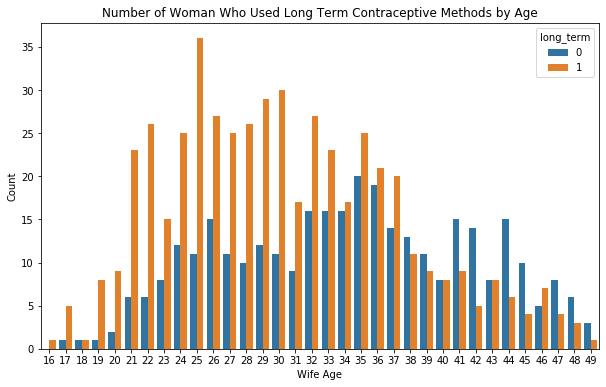

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='wife_age',
    hue="long_term",
    data=contraceptive_data_analysis.sort_values('wife_age')
)
plt.title("Number of Woman Who Used Long Term Contraceptive Methods by Age")
plt.xlabel("Wife Age")
plt.ylabel("Count")
plt.show()

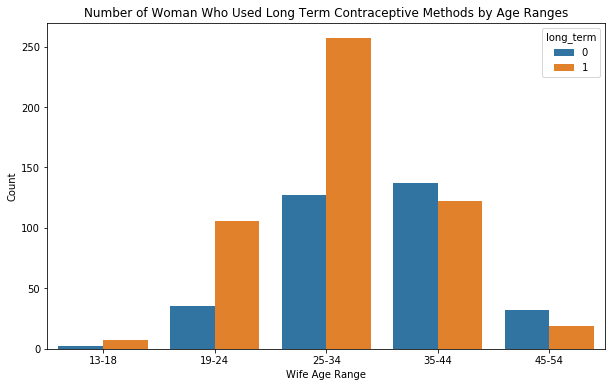

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='wife_age_range',
    hue="long_term",
    data=contraceptive_data_analysis.sort_values('wife_age_range')
)
plt.title("Number of Woman Who Used Long Term Contraceptive Methods by Age Ranges")
plt.xlabel("Wife Age Range")
plt.ylabel("Count")
plt.show()
plt.show()

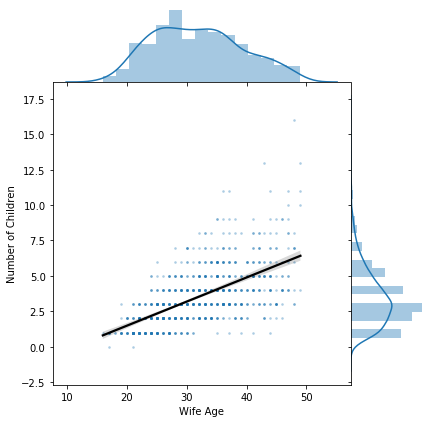

In [33]:
sns.jointplot(
    x='wife_age', 
    y='num_child', 
    data=contraceptive_data_analysis.sort_values('wife_age'),
    stat_func=None,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
    line_kws={
        'color': 'black'
    }
)
plt.xlabel("Wife Age")
plt.ylabel("Number of Children")
plt.show()

# Contraceptive Reviews Analysis

In [34]:
contraceptive_reviews = pd.read_csv("https://github.com/kmart67/data_100_contraceptive_final_proj/raw/master/data/webmd_contraceptive_reviews.csv")
contraceptive_reviews.rename(columns={'Unnamed: 0': 'Review_Id'}, inplace=True)
contraceptive_reviews['Comment'].fillna("", inplace=True)
contraceptive_reviews.dropna(inplace=True)
contraceptive_reviews.head()

,Review_Id,Drug_Name,Long_Term,Short_Term,Comment,Reviewer_Age_Range,Treatment_Length
0,0,Mirena Intrauterine Device,1,0,"I did initially experience excruciating, breat...",25-34,5 to less than 10 years
1,1,Mirena Intrauterine Device,1,0,Memory Loss!!! Never again on any form of birt...,35-44,2 to less than 5 years
3,3,Mirena Intrauterine Device,1,0,I had a Mirena placed in me in 2006. I had maj...,45-54,5 to less than 10 years
4,4,Mirena Intrauterine Device,1,0,The Mirena IUD was the worst thing to ever hap...,19-24,2 to less than 5 years
5,5,Mirena Intrauterine Device,1,0,"Side effects headaches,nausea,mood swings, ner...",13-18,2 to less than 5 years


In [35]:
sent = pd.read_csv('https://github.com/kmart67/data_100_contraceptive_final_proj/raw/master/vader_lexicon.txt', sep='\t', header=None)  
sent.drop(columns=[2, 3], inplace=True)
sent.rename(columns={0: "word", 1: "polarity"}, inplace=True)
sent.set_index("word", inplace=True)
sent.head()

,polarity
word,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [36]:
contraceptive_reviews['Comment_Text'] = contraceptive_reviews['Comment'].str.lower()
punct_re = r'[^a-zA-Z0-9\s]'
contraceptive_reviews['Comment_No_Punc'] = contraceptive_reviews['Comment_Text'].str.replace(punct_re, ' ', regex=True)
contraceptive_reviews.head()

,Review_Id,Drug_Name,Long_Term,Short_Term,Comment,Reviewer_Age_Range,Treatment_Length,Comment_Text,Comment_No_Punc
0,0,Mirena Intrauterine Device,1,0,"I did initially experience excruciating, breat...",25-34,5 to less than 10 years,"i did initially experience excruciating, breat...",i did initially experience excruciating breat...
1,1,Mirena Intrauterine Device,1,0,Memory Loss!!! Never again on any form of birt...,35-44,2 to less than 5 years,memory loss!!! never again on any form of birt...,memory loss never again on any form of birt...
3,3,Mirena Intrauterine Device,1,0,I had a Mirena placed in me in 2006. I had maj...,45-54,5 to less than 10 years,i had a mirena placed in me in 2006. i had maj...,i had a mirena placed in me in 2006 i had maj...
4,4,Mirena Intrauterine Device,1,0,The Mirena IUD was the worst thing to ever hap...,19-24,2 to less than 5 years,the mirena iud was the worst thing to ever hap...,the mirena iud was the worst thing to ever hap...
5,5,Mirena Intrauterine Device,1,0,"Side effects headaches,nausea,mood swings, ner...",13-18,2 to less than 5 years,"side effects headaches,nausea,mood swings, ner...",side effects headaches nausea mood swings ner...


In [37]:
comment_tidy_format = contraceptive_reviews['Comment_No_Punc'].str.split(expand=True).stack().reset_index()
comment_tidy_format.rename(columns={'level_1': "word_ind", 0: "word", 'level_0': 'review_num'}, inplace=True)
comment_tidy_format.head(25)

,review_num,word_ind,word
0,0,0,i
1,0,1,did
2,0,2,initially
3,0,3,experience
4,0,4,excruciating
5,0,5,breathtaking
6,0,6,cramps
7,0,7,during
8,0,8,and
9,0,9,immediately


In [22]:
comment_polarity = comment_tidy_format.merge(sent, how='left', left_on='word', right_index=True).fillna(0)
comment_polarity = comment_polarity.groupby(['review_num']).sum()[['polarity']]
contraceptive_reviews = contraceptive_reviews.merge(comment_polarity, how='left', left_index=True, right_index=True)
contraceptive_reviews.drop(columns=['Comment_Text', 'Comment_No_Punc', 'Review_Id'], inplace=True)
contraceptive_reviews.rename(columns={'polarity': 'Comment_Polarity'}, inplace=True)
contraceptive_reviews['Comment_Polarity'].fillna(0, inplace=True)
contraceptive_reviews

,Drug_Name,Long_Term,Short_Term,Comment,Reviewer_Age_Range,Treatment_Length,Comment_Polarity
0,Mirena Intrauterine Device,1,0,"I did initially experience excruciating, breat...",25-34,5 to less than 10 years,2.3
1,Mirena Intrauterine Device,1,0,Memory Loss!!! Never again on any form of birt...,35-44,2 to less than 5 years,-1.3
2,Mirena Intrauterine Device,1,0,Horrible experience would not recommend to nob...,NaN,NaN,5.6
3,Mirena Intrauterine Device,1,0,I had a Mirena placed in me in 2006. I had maj...,45-54,5 to less than 10 years,-9.8
4,Mirena Intrauterine Device,1,0,The Mirena IUD was the worst thing to ever hap...,19-24,2 to less than 5 years,-9.6
...,...,...,...,...,...,...,...
20778,VCF Gel with Prefilled Applicator,0,1,it was very effective.,19-24,1 to less than 2 years,2.1
20779,Femynor,0,1,since taking this medication I have had nausea...,13-18,less than 1 month,0.0
20780,TriNessa Lo,0,1,,19-24,1 to 6 months,0.0
20781,Tri-Lo-Estarylla,0,1,my doctor put me on tri-leveln so that I would...,25-34,1 to less than 2 years,2.3


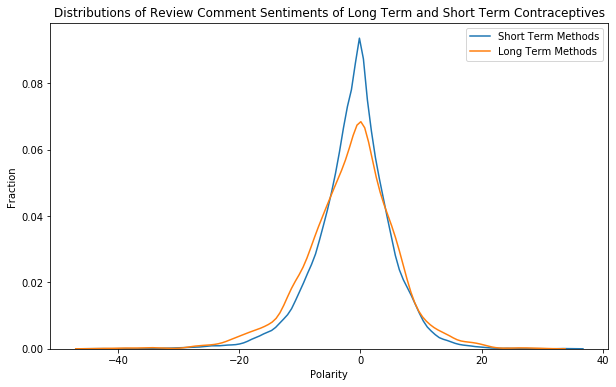

In [23]:
short_term = contraceptive_reviews[contraceptive_reviews['Short_Term'] == 1]
long_term = contraceptive_reviews[contraceptive_reviews['Long_Term'] == 1]

plt.figure(figsize=(10,6))
sns.distplot(short_term.loc[:, ['Comment_Polarity']], hist=False, label="Short Term Methods")
sns.distplot(long_term.loc[:, ['Comment_Polarity']], hist=False, label="Long Term Methods")
plt.title("Distributions of Review Comment Sentiments of Long Term and Short Term Contraceptives")
plt.xlabel("Polarity")
plt.ylabel("Fraction")
plt.legend()
plt.show()

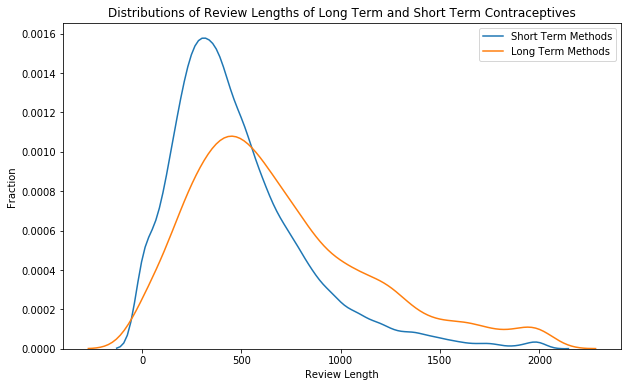

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(short_term['Comment'].str.len(), hist=False, label="Short Term Methods")
sns.distplot(long_term['Comment'].str.len(), hist=False, label="Long Term Methods")
plt.title("Distributions of Review Lengths of Long Term and Short Term Contraceptives")
plt.xlabel("Review Length")
plt.ylabel("Fraction")
plt.legend()
plt.show()

In [42]:
contraceptive_reviews['Treatment_Length'].value_counts()

 1 to 6 months                                7894
 less than 1 month                            3172
 6 months to less than 1 year                 2679
 1 to less than 2 years                       2252
 2 to less than 5 years                       2153
 5 to less than 10 years                       745
 10 years or more                              203
 1 to 6 months                                 192
 less than 1 month                              78
 1 to 6 months (Caregiver)                      68
 6 months to less than 1 year                   67
 2 to less than 5 years                         59
 1 to less than 2 years                         56
 less than 1 month (Caregiver)                  26
 6 months to less than 1 year (Caregiver)       21
 5 to less than 10 years                        20
 2 to less than 5 years (Caregiver)             18
 1 to less than 2 years (Caregiver)             17
 10 years or more                               10
 5 to less than 10 years (Careg

In [57]:
def fix_treatment_lengths(tl):
    if "less than 1 month" in tl:
        return "less than 1 month"
    
    if "1 to 6 months" in tl:
        return "1 to 6 months"
    
    if "6 months to less than 1 year" in tl:
        return "6 months to less than 1 year"
    
    if "1 to less than 2 years" in tl:
        return "1 to less than 2 years"
    
    if "2 to less than 5 years" in tl:
        return "2 to less than 5 years"
    
    if "5 to less than 10 years" in tl:
        return "5 to less than 10 years"
    
    if "10 years or more" in tl:
        return "10 years or more"
    
def treatment_category(tl):
    if "less than 1 month" in tl:
        return 0
    
    if "1 to 6 months" in tl:
        return 1
    
    if "6 months to less than 1 year" in tl:
        return 2
    
    if "1 to less than 2 years" in tl:
        return 3
    
    if "2 to less than 5 years" in tl:
        return 4
    
    if "5 to less than 10 years" in tl:
        return 5
    
    if "10 years or more" in tl:
        return 6
    
contraceptive_reviews['Treatment_Length'] = contraceptive_reviews.apply(lambda row: fix_treatment_lengths(row.Treatment_Length), axis = 1)
contraceptive_reviews['Treatment_Length_Category'] = contraceptive_reviews.apply(lambda row: treatment_category(row.Treatment_Length), axis = 1)
contraceptive_reviews.head()
contraceptive_reviews.head()


,Review_Id,Drug_Name,Long_Term,Short_Term,Comment,Reviewer_Age_Range,Treatment_Length,Comment_Text,Comment_No_Punc,Treatment_Length_Category
0,0,Mirena Intrauterine Device,1,0,"I did initially experience excruciating, breat...",25-34,5 to less than 10 years,"i did initially experience excruciating, breat...",i did initially experience excruciating breat...,5
1,1,Mirena Intrauterine Device,1,0,Memory Loss!!! Never again on any form of birt...,35-44,2 to less than 5 years,memory loss!!! never again on any form of birt...,memory loss never again on any form of birt...,4
3,3,Mirena Intrauterine Device,1,0,I had a Mirena placed in me in 2006. I had maj...,45-54,5 to less than 10 years,i had a mirena placed in me in 2006. i had maj...,i had a mirena placed in me in 2006 i had maj...,5
4,4,Mirena Intrauterine Device,1,0,The Mirena IUD was the worst thing to ever hap...,19-24,2 to less than 5 years,the mirena iud was the worst thing to ever hap...,the mirena iud was the worst thing to ever hap...,4
5,5,Mirena Intrauterine Device,1,0,"Side effects headaches,nausea,mood swings, ner...",13-18,2 to less than 5 years,"side effects headaches,nausea,mood swings, ner...",side effects headaches nausea mood swings ner...,4


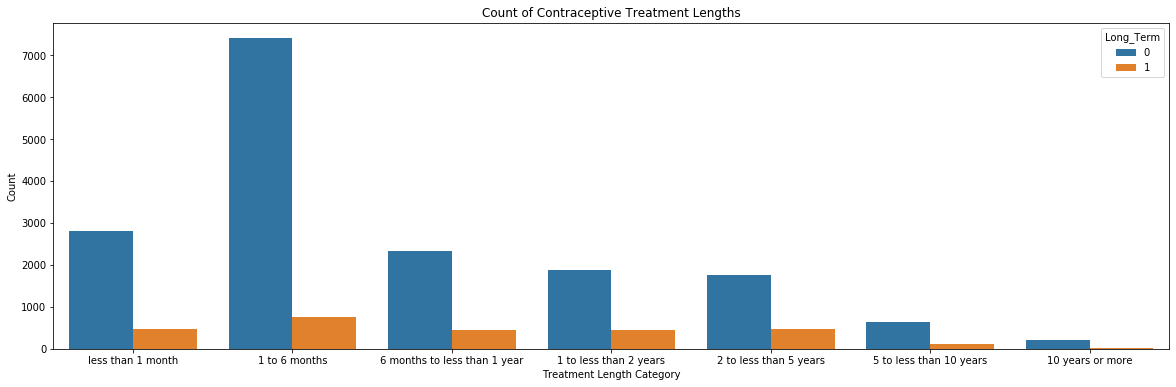

In [61]:
plt.figure(figsize=(20,6))
sns.countplot(
    x='Treatment_Length',
    hue='Long_Term',
    data=contraceptive_reviews.sort_values('Treatment_Length_Category')
)
plt.title("Count of Contraceptive Treatment Lengths")
plt.xlabel("Treatment Length Category")
plt.ylabel("Count")
plt.show()

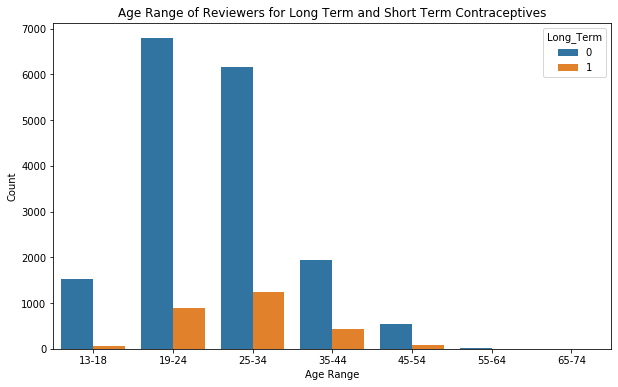

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='Reviewer_Age_Range',
    hue="Long_Term",
    data=contraceptive_reviews.sort_values('Reviewer_Age_Range')
)
plt.title("Age Range of Reviewers for Long Term and Short Term Contraceptives")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.show()

# Final Contraceptive Model

In [65]:
contraceptive_altered.head()

,wife_age,WifeEd_low,WifeEd_med-low,WifeEd_med-high,WifeEd_high,HusEd_low,HusEd_med-low,HusEd_med-high,HusEd_high,num_child,...,HusOcc_1,HusOcc_2,HusOcc_3,HusOcc_4,StdLiv_low,StdLiv_med-low,StdLiv_med-high,StdLiv_high,media_exposure,contraceptive
0,24,0,1,0,0,0,0,1,0,3,...,0,1,0,0,0,0,1,0,0,1
1,45,1,0,0,0,0,0,1,0,10,...,0,0,1,0,0,0,0,1,0,1
2,43,0,1,0,0,0,0,1,0,7,...,0,0,1,0,0,0,0,1,0,1
3,42,0,0,1,0,0,1,0,0,9,...,0,0,1,0,0,0,1,0,0,1
4,36,0,0,1,0,0,0,1,0,8,...,0,0,1,0,0,1,0,0,0,1


In [88]:
#Splits the altered Contraceptive Data into test and training sets
list_cols = ['wife_age', 'WifeEd_low', 'WifeEd_med-low', 'WifeEd_med-high', 'WifeEd_high',
 'HusEd_low', 'HusEd_med-low', 'HusEd_med-high', 'HusEd_high', 'num_child', 'Wife_Non-Islam',
 'Wife_Islam', 'Wife_Working', 'Wife_Not_Working', 'HusOcc_1', 'HusOcc_2', 'HusOcc_3',
 'HusOcc_4', 'StdLiv_low', 'StdLiv_med-low', 'StdLiv_med-high', 'StdLiv_high', 'media_exposure', 
'Wife_Non-Islam','Wife_Islam'
]

contra_train, contra_test = train_test_split(contraceptive_altered, test_size=0.25, random_state=100)
X_train = contra_train[list_cols]
X_test = np.array(contra_test[list_cols])
Y_train = contra_train['contraceptive']
Y_test = np.array(contra_test['contraceptive'])

In [89]:
#Creates and fits a logistic regression model based on features from contraceptive_altered 
logistic_regression_model = LogisticRegression(multi_class='multinomial', max_iter=1000)
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
print('Cross Validation: ', np.mean(cross_val_score(logistic_regression_model, X_train, Y_train, cv=5)))
print('Accuracy: ', logistic_regression_model.score(X_train, Y_train))

Cross Validation:  0.5289633895516249
Accuracy:  0.5534420289855072


In [92]:
print('Cross Validation: ', np.mean(cross_val_score(logistic_regression_model, X_test, Y_test, cv=5)))
print('Accuracy: ', logistic_regression_model.score(X_test, Y_test))

Cross Validation:  0.4768604220659015
Accuracy:  0.4742547425474255
